# Análisis Exploratorio y Procesamiento de Datos 

## Objetivo general

Se busca desarrollar un **algoritmo de recomendación por similitud entre productos audiovisuales**, utilizando elementos en común tales como el género, la trama, el elenco y el director o directora.

Para eso se cuenta con un dataset de títulos de películas y programas de televisión disponibles en la plataforma Amazon Prime, así como una serie de datasets de puntajes asignados por usuarios a distintos títulos.

## Objetivos específicos
- Caracterizar el dataset de títulos de películas y programas de televisión disponibles en la plataforma Amazon Prime: 
    - cuántas observaciones contiene
    - qué columnas tiene y qué información aporta cada una
- Determinar si hay valores faltantes y cómo proceder
- Explorar y visualizar:
    - ¿Cuántas películas y cuántas series hay en la plataforma?
    - ¿Cuántas hay por año?
    - ¿Cuántas hay para cada tipo de público?


Fuente de dataset: https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows

In [2]:
# importamos panda y numpy
import pandas as pd
import numpy as np

In [3]:
## chequeamos el working directory
%pwd

'C:\\Users\\Luna\\JupyterNotebook\\DataScience Ingenias'

In [38]:
# importamos el dataset en una varialbe llamada amazon
amazon = pd.read_csv('.\\datasets\\amazon_prime_titles.csv')

In [40]:
## vemos la forma del dataset
forma = amazon.shape
f"El dataset tiene {forma[0]} filas y {forma[1]} columnas"

'El dataset tiene 9668 filas y 12 columnas'

In [46]:
# Chequeamos si hay filas duplicadas
dupl = amazon.duplicated()
print(dupl.value_counts())

False    9668
dtype: int64


No hay filas duplicadas, seguimos adelante. 

## Exploración de las columnas

In [47]:
# vemos los nombres de las columnas
print(amazon.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


Cambiamos los nombres de las columnas para que estén en español y sean más intuitivos:

In [48]:

amazon.columns = ['show_id', 'tipo', 'titulo', 'director', 'elenco', 
                  'pais', 'fecha_agregado', 'anio', 'calificacion', 'duracion', 
                 'listado_en', 'descripcion']

In [49]:
# chequeamos que los nombres cambiaron
print(amazon.columns)

Index(['show_id', 'tipo', 'titulo', 'director', 'elenco', 'pais',
       'fecha_agregado', 'anio', 'calificacion', 'duracion', 'listado_en',
       'descripcion'],
      dtype='object')


In [50]:
# vemos las primeras filas del dataset
amazon.head(10)

,show_id,tipo,titulo,director,elenco,pais,fecha_agregado,anio,calificacion,duracion,listado_en,descripcion
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
5,s6,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,"March 30, 2021",1989,NaN,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...
6,s7,Movie,Hired Gun,Fran Strine,"Alice Cooper, Liberty DeVitto, Ray Parker Jr.,...",United States,"March 30, 2021",2017,NaN,98 min,"Documentary, Special Interest","They are the ""First Call, A-list"" musicians, j..."
7,s8,Movie,Grease Live!,"Thomas Kail, Alex Rudzinski","Julianne Hough, Aaron Tveit, Vanessa Hudgens, ...",United States,"March 30, 2021",2016,NaN,131 min,Comedy,"This honest, uncompromising comedy chronicles ..."
8,s9,Movie,Global Meltdown,Daniel Gilboy,"Michael Paré, Leanne Khol Young, Patrick J. Ma...",Canada,"March 30, 2021",2017,NaN,87 min,"Action, Science Fiction, Suspense",A helicopter pilot and an environmental scient...
9,s10,Movie,David's Mother,Robert Allan Ackerman,"Kirstie Alley, Sam Waterston, Stockard Channing",United States,"April 1, 2021",1994,NaN,92 min,Drama,Sally Goodson is a devoted mother to her autis...


### Las columnas contienen los siguientes datos:
- **show_id:** identificador único de cada serie o película
- **tipo:** indica si se trata de una serie ("TV Show") o de una película ("Movie")
- **titulo**
- **director**
- **elenco:** lista separada por comas de los nombres del elenco
- **pais:** país de producción
- **fecha_agregado:** fecha en que se agregó a la plataforma
- **anio:** año de producción
- **calificacion:** edad mínima o público recomendado
- **duracion:** duración en minutos para películas, en temporadas para series </br>
        - *Procesamiento necesario:* eliminar las palabras "min"/"season" y convertir a integer
- **listado_en:** géneros en los cuales aparece listada la serie o película en la plataforma. </br>
       - *Procesamiento necesario:* Valores separados por comas, hay que separar en columnas tipo dummies. Cada producto aparece listado en al menos una categoría/género, pero la cantidad total es variable. 
- **descripcion:** una descripción en inglés de la trama de la serie o película

## Análisis de datos faltantes

In [51]:
# Vemos cuántos valores faltantes tiene cada columna:
missing_values = amazon.isnull().sum().sort_values(ascending = False) # contabiliza
        # datos faltantes y los ordena de mayor a menor
        # según la columna
missing_values

fecha_agregado    9513
pais              8996
director          2082
elenco            1233
calificacion       337
show_id              0
tipo                 0
titulo               0
anio                 0
duracion             0
listado_en           0
descripcion          0
dtype: int64

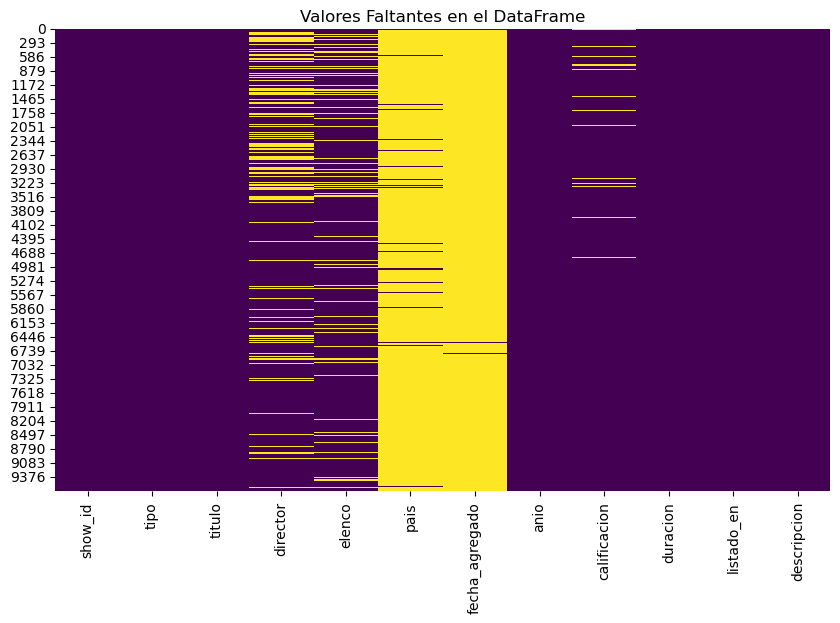

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(amazon.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

Vemos que la columna fecha_agregada son casi todos datos faltantes. Lo mismo pasa con la columna país. Estos no van a ser elementos útiles para la recomendación. </br>
Las columnas más importantes para el sistema de recomendación (título, descripcion, calificacion, elenco, listado_en) no tienen datos faltantes, asíque podemos trabajar con ellas sin problema. 

### ¿Cuántas películas y cuántas series hay en la plataforma?

In [62]:
# Contar la cantidad de filas por tipo
contar_tipo = amazon['tipo'].value_counts()
print(f"Hay {contar_tipo[0]} películas y {contar_tipo[1]} series")


Hay 7814 películas y 1854 series


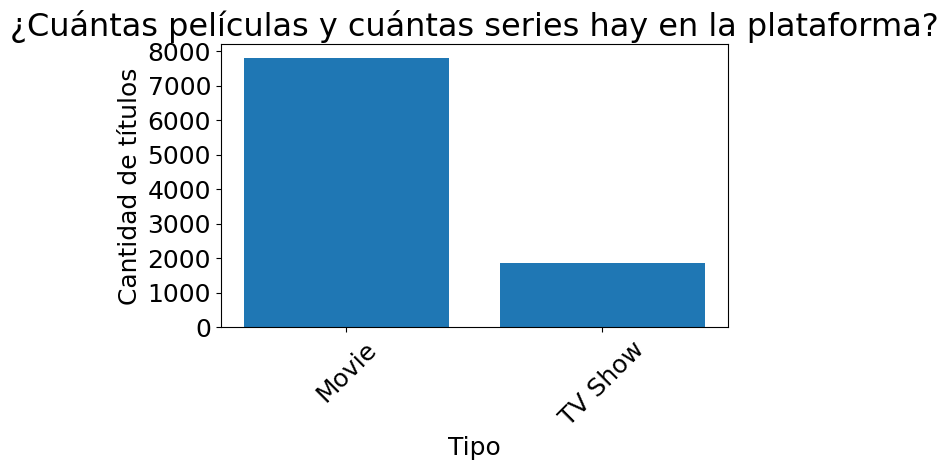

In [63]:
# Visualizamos
# Crear el gráfico de barras
plt.bar(contar_tipo.index, contar_tipo.values)
plt.xlabel('Tipo', fontsize=18)
plt.ylabel('Cantidad de títulos', fontsize=18)
plt.title('¿Cuántas películas y cuántas series hay en la plataforma?', fontsize=23)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Columna calificación

In [64]:
# Contamos la cantidad de filas para cada calificacion
contar_calif = amazon['calificacion'].value_counts()
print(contar_calif)

13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: calificacion, dtype: int64


Dado que las calificaciones para TV y cine son distintas, vamos a graficarlas por separado. 

In [65]:
# Armo un nuevo dataframe filtrando por el valor de la columna tipo
amazon_peli = amazon[amazon['tipo'] == "Movie"]
amazon_peli.shape ## chequeo la cantidad de filas

(7814, 12)

In [66]:
# Armo un nuevo dataframe filtrando por el valor de la columna tipo
amazon_tv = amazon[amazon['tipo'] == "TV Show"]
amazon_tv.shape ## chequeo la cantidad de filas

(1854, 12)

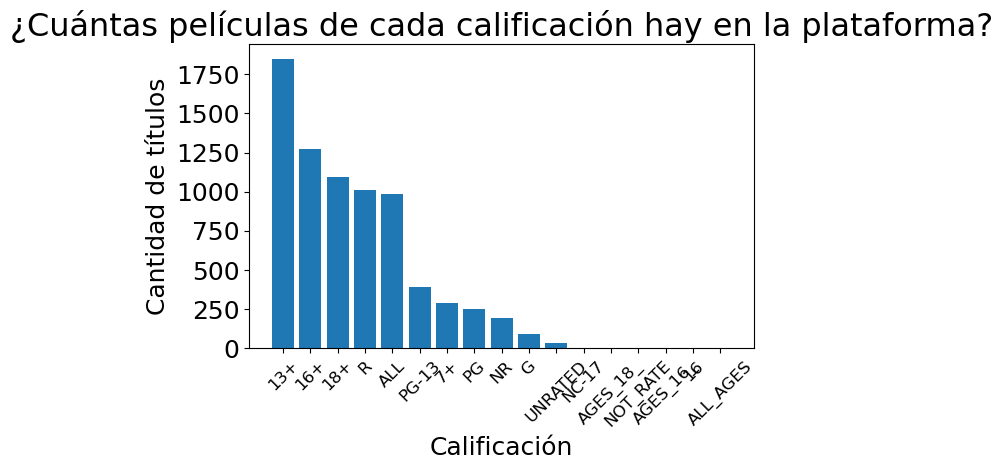

In [72]:
# Contar la cantidad de filas 
contar_calif_peli = amazon_peli['calificacion'].value_counts()

# Crear el gráfico de barras
plt.bar(contar_calif_peli.index, contar_calif_peli.values)
plt.xlabel('Calificación', fontsize=18)
plt.ylabel('Cantidad de títulos', fontsize=18)
plt.title('¿Cuántas películas de cada calificación hay en la plataforma?', fontsize=23)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=18)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Habría que limpiar los valores de calificación, ya que vemos que las categorías con menor frecuencia son repeticiones de las de mayor frecuencia. </br>
Pero vamos a seguir adelante. 

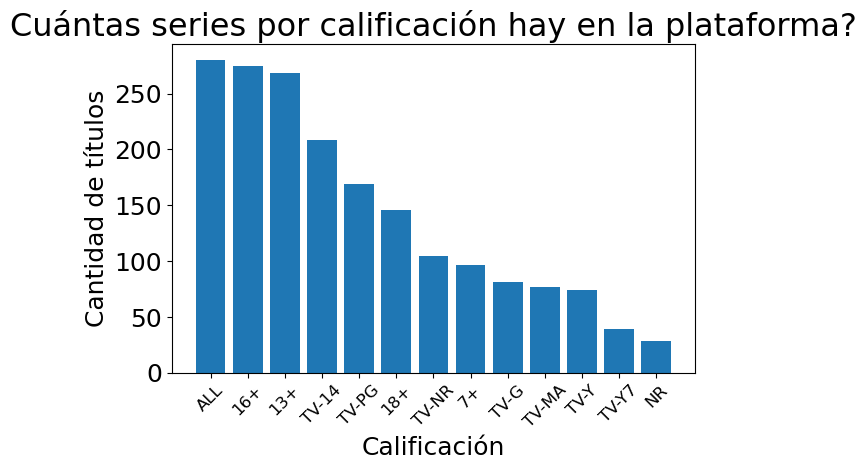

In [74]:
# Contar la cantidad de filas 
contar_calif_tv = amazon_tv['calificacion'].value_counts()

# Crear el gráfico de barras
plt.bar(contar_calif_tv.index, contar_calif_tv.values)
plt.xlabel('Calificación', fontsize=18)
plt.ylabel('Cantidad de títulos', fontsize=18)
plt.title('Cuántas series por calificación hay en la plataforma?', fontsize=23)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=18)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [75]:
# Vamos a guardar los dataframe en archivos CSV
amazon_peli.to_csv('.\\datasets\\amazon_peli.csv', index=False)
amazon_tv.to_csv('.\\datasets\\amazon_tv.csv', index=False)

## Columna duracion

In [76]:
# vemos la columna duracion para las películas
amazon_peli.head(3)

,show_id,tipo,titulo,director,elenco,pais,fecha_agregado,anio,calificacion,duracion,listado_en,descripcion
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...


In [28]:
# vemos la columna duracion para las series
amazon_tv.head(3)

,show_id,tipo,titulo,director,elenco,pais,fecha_agregado,anio,calificacion,duracion,listado_en,descripcion
17,s18,TV Show,Zoo Babies,NaN,Narrator - Gillian Barlett,NaN,NaN,2008,ALL,1 Season,"Kids, Special Interest",A heart warming and inspiring series that welc...
18,s19,TV Show,Zoë Coombs Marr: Bossy Bottom,NaN,Zoë Coombs Marr,NaN,NaN,2020,18+,1 Season,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...
20,s21,TV Show,Zoboomafoo,NaN,NaN,NaN,NaN,2001,TV-Y,1 Season,Kids,Chris and Martin Kratt bring their enthusiasm ...


Vemos que para las películas, la duracion se expresa como cantidad de minutos.  </br>
Mientras que para las series, se expresa como cantidad de temporadas. 
</br>
Esto significa que solamente podremos usar esta columna para clasificar por separado series o películas, ya que miden distintas propiedades (minutos y temporadas respectivamente). </br>
Vamos a procesar los datos de la columna para poder utilizarlos. 

In [84]:
amazon_peli = pd.read_csv('.\\datasets\\amazon_peli.csv')
amazon_tv = pd.read_csv('.\\datasets\\amazon_tv.csv')

In [85]:
# Quitamos "min" y convertir a integer 
amazon_peli['duracion'] = amazon_peli['duracion'].str.replace(' min', '').astype(int)


In [107]:
# Ahora con las series
# Obtenemos los valores unicos en la columna duracion para las series 
uniquedur = amazon_tv['duracion'].unique()
print(uniquedur)

['1' '3s' '2s' '4s' '7s' '9s' '6s' '5s' '29s' '19s' '21s' '8s' '12s' '11s'
 '10s' '14s' '15s']


Vemos que hay algunas filas con el formato "numero + season/seasons" y otras con el formato "numero + s". </br>
Asíque algunas son temporadas y otras segundos. </br>
Por ahora vamos a reemplazar las que estén en temporadas. 

In [108]:
# Quitamos "Season" y "Seasons"
amazon_tv['duracion'] = amazon_tv['duracion'].str.replace(' Season', '').str.replace(' Seasons', '')


Aun no podemos convertir a integer porque algunas filas están en segundos y no fueron modificadas, así que al convertir a integer se volverían nulas. </br>
Por ahora vamos a seguir adelante aunque queda pendiente el procesamiento de esta columna. </br>
Según cómo querramos utilizar las distintas formas de duración, quizás deberíamos crear distintas columnas para cada forma de medición, y explorar por qué algunos productos se miden en segundos (qué tipo de productos son? nos sirven para el análisis? deberíamos eliminarlos?).


### ¿Cuántas series y películas de cada año hay en la plataforma?

<Figure size 1000x600 with 0 Axes>

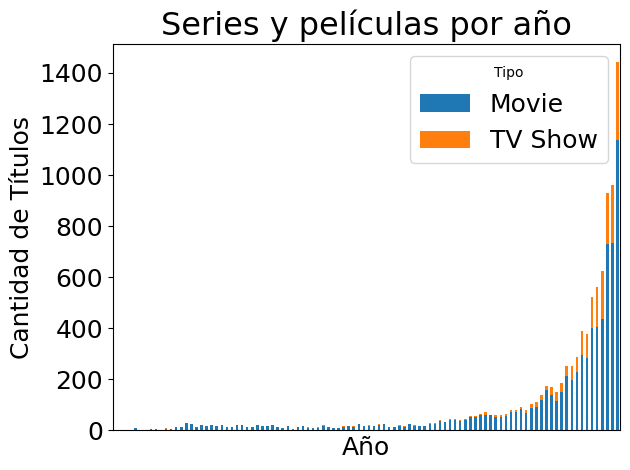

In [91]:
# Agrupar por tipo y anio, y contar la cantidad de filas
contar_anio = amazon.groupby(['anio', 'tipo']).size().unstack()

# Crear un gráfico de barras apiladas con anio en el eje x
plt.figure(figsize=(10, 6))
contar_anio.plot(kind='bar', stacked=True)
plt.xlabel('Año', fontsize = 18)
plt.ylabel('Cantidad de Títulos', fontsize = 18)
plt.title('Series y películas por año', fontsize = 23)
plt.legend(title='Tipo', fontsize = 18)
plt.xticks([]) # eliminar etiquetas de eje x porque queda muy cargado
plt.yticks(fontsize = 18)
plt.tight_layout()
plt.show()

## Columna listado_en: categorías y géneros

In [94]:
amazon['listado_en'].head(3)

0              Comedy, Drama
1       Drama, International
2    Action, Drama, Suspense
Name: listado_en, dtype: object

Vemos que la columna listado_en contiene varios valores separados por comas. Vamos a separar cada valor en una columna para poder utilizarlas para agrupar las filas. 

In [92]:
# Dividir los valores en columnas separadas
generos = amazon['listado_en'].str.split(',', expand=True)
print(generos)

                0               1          2     3     4
0          Comedy           Drama       None  None  None
1           Drama   International       None  None  None
2          Action           Drama   Suspense  None  None
3     Documentary            None       None  None  None
4           Drama         Fantasy       None  None  None
...           ...             ...        ...   ...   ...
9663       Comedy            None       None  None  None
9664     TV Shows            None       None  None  None
9665       Action            None       None  None  None
9666        Drama          Sports       None  None  None
9667       Action           Drama   Suspense  None  None

[9668 rows x 5 columns]


In [95]:
generos.columns = ['gen1', 'gen2', 'gen3', 'gen4', 'gen5']

In [96]:
print(generos)

             gen1            gen2       gen3  gen4  gen5
0          Comedy           Drama       None  None  None
1           Drama   International       None  None  None
2          Action           Drama   Suspense  None  None
3     Documentary            None       None  None  None
4           Drama         Fantasy       None  None  None
...           ...             ...        ...   ...   ...
9663       Comedy            None       None  None  None
9664     TV Shows            None       None  None  None
9665       Action            None       None  None  None
9666        Drama          Sports       None  None  None
9667       Action           Drama   Suspense  None  None

[9668 rows x 5 columns]


In [97]:
# Concatenar las nuevas columnas al DataFrame original
amazon = pd.concat([amazon, generos], axis=1)
print(amazon)

     show_id     tipo                   titulo         director  \
0         s1    Movie      The Grand Seduction     Don McKellar   
1         s2    Movie     Take Care Good Night     Girish Joshi   
2         s3    Movie     Secrets of Deception      Josh Webber   
3         s4    Movie       Pink: Staying True   Sonia Anderson   
4         s5    Movie            Monster Maker     Giles Foster   
...      ...      ...                      ...              ...   
9663   s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
9664   s9665  TV Show            Planet Patrol              NaN   
9665   s9666    Movie                  Outpost     Steve Barker   
9666   s9667  TV Show  Maradona: Blessed Dream              NaN   
9667   s9668    Movie              Harry Brown    Daniel Barber   

                                                 elenco            pais  \
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1      Mahesh Manjrekar, Abhay Mahajan, Sachi

No pude procesar esta columna de manera que me permita agrupar y graficar por género/categoría. Un camino posible sería crear columnas dummies para cada categoría, tal que cada fila contenga 1 o 0 según corresponda. Pero quizás hay una forma más elegante ya que serían muchas columnas dummies. 

A partir de acá es todo muy exploratorio:

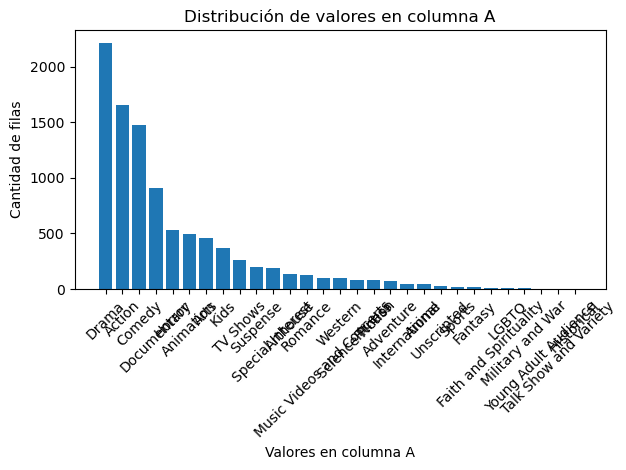

In [98]:
# Contar la cantidad de filas para cada valor único en gen1
contar_gen1 = amazon['gen1'].value_counts()

# Crear el gráfico de barras
plt.bar(contar_gen1.index, contar_gen1.values)
plt.xlabel('Valores en columna A')
plt.ylabel('Cantidad de filas')
plt.title('Distribución de valores en columna A')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [36]:
# Obtener los valores únicos en la columna
uniquegen1 = amazon['gen1'].unique()
print(uniquegen1)

['Comedy' 'Drama' 'Action' 'Documentary' 'Fantasy' 'Adventure' 'Horror'
 'Kids' 'Science Fiction' 'Arts' 'TV Shows' 'Animation' 'Anime'
 'Music Videos and Concerts' 'Fitness' 'Faith and Spirituality'
 'Special Interest' 'Suspense' 'Unscripted' 'Western' 'Arthouse' 'Sports'
 'Military and War' 'International' 'Romance' 'Young Adult Audience'
 'Talk Show and Variety' 'LGBTQ' 'Historical']


In [37]:
# Obtener los valores únicos en la columna
uniquegen2 = amazon['gen2'].unique()
print(uniquegen2)

[' Drama' ' International' None ' Fantasy' ' Kids' ' Special Interest'
 ' Science Fiction' ' Suspense' ' Sports' ' Talk Show and Variety'
 ' Anime' ' Entertainment' ' Adventure' ' Military and War' ' Western'
 ' Animation' ' LGBTQ' ' Romance' ' Documentary' ' Faith and Spirituality'
 ' Young Adult Audience' ' Comedy' ' Horror' ' Music Videos and Concerts'
 ' Unscripted' ' Historical' ' Arts' ' Arthouse']


In [38]:
# Obtener los valores únicos en la columna
uniquegen3 = amazon['gen3'].unique()
print(uniquegen3)

[None ' Suspense' ' Comedy' ' and Culture' ' Fantasy' ' Animation'
 ' Western' ' Kids' ' Unscripted' ' Sports' ' Special Interest' ' Drama'
 ' International' ' Anime' ' LGBTQ' ' Romance' ' Young Adult Audience'
 ' Horror' ' Science Fiction' ' Faith and Spirituality' ' Historical'
 ' Military and War' ' Entertainment' ' Documentary'
 ' Talk Show and Variety' ' Arts' ' Music Videos and Concerts']


In [39]:
# Obtener los valores únicos en la columna
uniquegen4 = amazon['gen4'].unique()
print(uniquegen4)

[None ' Comedy' ' Documentary' ' Drama' ' and Culture'
 ' Music Videos and Concerts' ' Entertainment' ' International' ' Romance'
 ' Horror' ' Fantasy' ' LGBTQ' ' Kids' ' Special Interest'
 ' Young Adult Audience']


In [40]:
# Obtener los valores únicos en la columna
uniquegen5 = amazon['gen5'].unique()
print(uniquegen5)

[None ' Drama' ' Talk Show and Variety' ' Special Interest'
 ' Music Videos and Concerts' ' Romance' ' Comedy' ' Documentary'
 ' Military and War' ' Western' ' Kids' ' International' ' and Culture'
 ' Unscripted' ' LGBTQ' ' Young Adult Audience' ' Science Fiction'
 ' Suspense' ' Horror' ' Faith and Spirituality']
